This tutorial illustrates how to export expression matrices and cell type labels from `SingleCellExperiment` objects to `.h5` file as input for scJoint using datasets that can be downloaded from 10xGenomics website. The scRNA-seq is downloaded via

```
wget https://cf.10xgenomics.com/samples/cell-exp/4.0.0/SC3_v3_NextGem_DI_PBMC_10K/SC3_v3_NextGem_DI_PBMC_10K_filtered_feature_bc_matrix.h5
```

Analysis of quality control, clustering is done to annotate the cell type for scRNA-seq data as training data. 

The scATAC-seq data is downloaded via

```
wget https://cf.10xgenomics.com/samples/cell-atac/1.2.0/atac_pbmc_10k_v1/atac_pbmc_10k_v1_filtered_peak_bc_matrix.h5
```

and the gene activity matrix is generated by Signac.

## Data from `SingleCellExperiment`

In [2]:
library(SingleCellExperiment)
library(DropletUtils)
library(scater)
library(ggplot2)

In [7]:
sce_10xPBMC_atac <- readRDS("../data_10x/sce_10xPBMC_atac.rds")
sce_10xPBMC_atac
sce_10xPBMC_rna <- readRDS("../data_10x/sce_10xPBMC_rna.rds")
sce_10xPBMC_rna

class: SingleCellExperiment 
dim: 20233 6913 
metadata(0):
assays(2): counts logcounts
rownames(20233): PLCXD1 GTPBP6 ... S100B PRMT2
rowData names(0):
colnames(6913): AAACGAAAGACACGGT-1 AAACGAAAGAGGTGGG-1 ...
  TTTGTGTTCCGTTTCG-1 TTTGTGTTCGCGCTGA-1
colData names(30): orig.ident nCount_peaks ... nFeature_RNA ident
reducedDimNames(2): LSI UMAP
mainExpName: NULL
altExpNames(0):

class: SingleCellExperiment 
dim: 25638 9841 
metadata(1): Samples
assays(2): counts logcounts
rownames(25638): AL627309.1 AL627309.3 ... AC007325.1 AC007325.4
rowData names(3): ID Symbol Type
colnames(9841): AAACCCAGTATCGTAC-1 AAACCCAGTCGGTGAA-1 ...
  TTTGTTGTCCTAGCTC-1 TTTGTTGTCCTATGGA-1
colData names(5): Sample Barcode sizeFactor cluster cellTypes
reducedDimNames(3): PCA UMAP TSNE
mainExpName: NULL
altExpNames(0):

In [8]:
table(droplevels(sce_10xPBMC_rna$cellTypes))


CD14+ Monocytes CD16+ Monocytes   Memory CD4+ T    Naive CD8+ T               B 
           3113             396            1231            1260             934 
             NK   Memory CD8+ T              DC          Plasma    Naive CD4+ T 
            431             802             153             107            1395 
      Platelets 
             19 

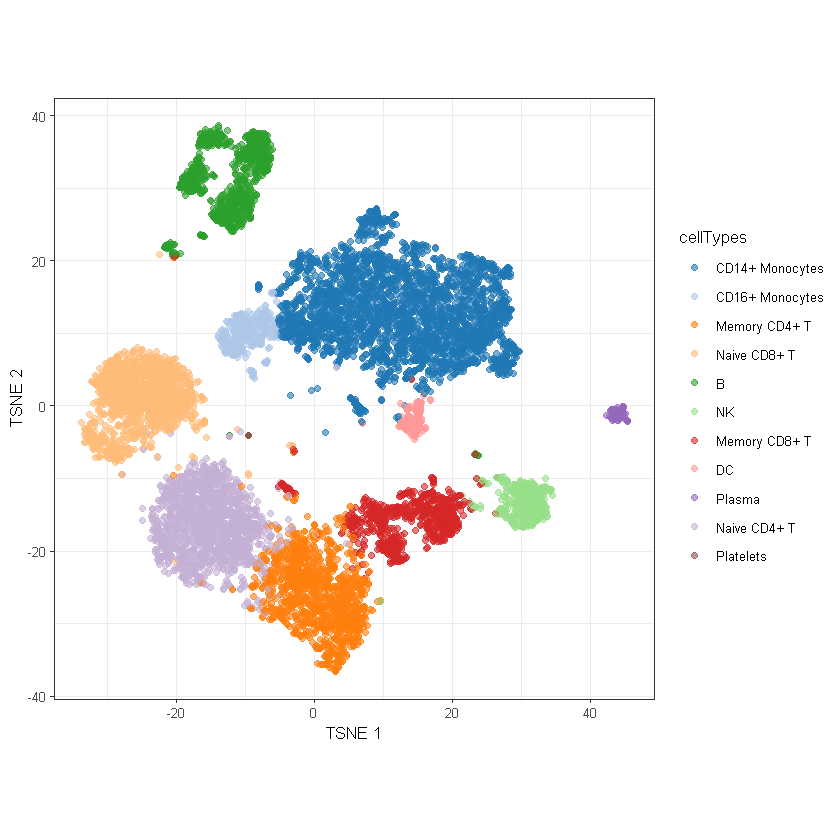

In [9]:
plotTSNE(sce_10xPBMC_rna, colour_by = "cellTypes") + theme(aspect.ratio = 1)

## Saving data as h5 files

In [10]:
# Only keep common genes between two dataset
common_genes <- intersect(rownames(sce_10xPBMC_atac),
                          rownames(sce_10xPBMC_rna))
length(common_genes)

# Extract the logcounts data from sce object
exprs_atac <- logcounts(sce_10xPBMC_atac[common_genes, ])
exprs_rna <- logcounts(sce_10xPBMC_rna[common_genes, ])

[1] 15463

`data_to_h5.R` file provides `write_h5_scJoint()` function to transform the expression matrix in R to `.h5` file, which can be used as input of `process_db.py()` to process input for scJoint.

In [13]:
source("../data_to_h5.R")
write_h5_scJoint(exprs_list = list(rna = exprs_rna,
                                   atac = exprs_atac), 
                 h5file_list = c("../data_10x/exprs_10xPBMC_rna.h5", 
                                 "../data_10x/exprs_10xPBMC_atac.h5"))
write_csv_scJoint(cellType_list =  list(rna = sce_10xPBMC_rna$cellTypes),
                  csv_list = c("../data_10x/cellType_10xPBMC_rna.csv"))

    group     name       otype dclass          dim
0       /   matrix   H5I_GROUP                    
1 /matrix barcodes H5I_DATASET STRING         9841
2 /matrix     data H5I_DATASET  FLOAT 9841 x 15463
3 /matrix features H5I_DATASET STRING        15463
    group     name       otype dclass          dim
0       /   matrix   H5I_GROUP                    
1 /matrix barcodes H5I_DATASET STRING         6913
2 /matrix     data H5I_DATASET  FLOAT 6913 x 15463
3 /matrix features H5I_DATASET STRING        15463


In [14]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-w64-mingw32/x64 (64-bit)
Running under: Windows 10 x64 (build 19044)

Matrix products: default

locale:
[1] LC_COLLATE=English_Hong Kong SAR.1252 
[2] LC_CTYPE=English_Hong Kong SAR.1252   
[3] LC_MONETARY=English_Hong Kong SAR.1252
[4] LC_NUMERIC=C                          
[5] LC_TIME=English_Hong Kong SAR.1252    

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] HDF5Array_1.22.1            DelayedArray_0.20.0        
 [3] Matrix_1.5-3                rhdf5_2.38.1               
 [5] scater_1.22.0               ggplot2_3.4.0              
 [7] scuttle_1.4.0               DropletUtils_1.14.2        
 [9] SingleCellExperiment_1.16.0 SummarizedExperiment_1.24.0
[11] Biobase_2.54.0              GenomicRanges_1.46.1       
[13] GenomeInfoDb_1.30.1         IRanges_2.28.0             
[15] S4Vectors_0.32.4            BiocGenerics_0.40.0        
[17] Mat